In [13]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd
import numpy as np

today = date.today()
ticker1 = 'AAPL'
start_date = '2020-01-02'
end = today
df = pdr.get_data_yahoo(ticker1, start=start_date, end=today)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152641,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441475,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018700,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.844353,132079200
...,...,...,...,...,...,...
2023-12-12,193.080002,194.720001,191.720001,194.710007,194.710007,52696900
2023-12-13,195.089996,198.000000,194.850006,197.960007,197.960007,70404200
2023-12-14,198.020004,199.619995,196.160004,198.110001,198.110001,66831600


In [14]:
#[id,date,priceOpen,priceClose, Xprice]
orders = []
a=0
strDate = str(df.index[a]).split()[0]
orders.append([a,strDate, df.Close[a], 0, 0])
lastPrice = df.Close[a]
grid=5
equity = []
a += 1
while a<len(df.iloc[1:]):
    spot = df.Close[a]
    if abs(spot-lastPrice) > grid:
        strDate = str(df.index[a]).split()[0]
        orders.append([a,strDate, spot, 0, 0])
        lastPrice = spot
        #close orders
        for idx, item in enumerate(orders):
            if item[3]==0 and item[2]+grid <= spot:
                orders[idx] = [item[0],item[1],item[2], spot, a]
        #check open orders
        openOrders = [x for x in orders if x[3]==0]
        equity.append( sum([spot-x[2] for x in openOrders]) )
    a += 1
    

In [15]:
orders

[[0, '2020-01-02', 75.0875015258789, 81.08499908447266, 18],
 [18, '2020-01-29', 81.08499908447266, 88.20999908447266, 110],
 [35, '2020-02-24', 74.54499816894531, 82.875, 107],
 [38, '2020-02-27', 68.37999725341797, 74.70249938964844, 40],
 [40, '2020-03-02', 74.70249938964844, 82.875, 107],
 [45, '2020-03-09', 66.5425033569336, 71.76249694824219, 70],
 [50, '2020-03-16', 60.5525016784668, 65.61750030517578, 65],
 [65, '2020-04-06', 65.61750030517578, 71.76249694824219, 70],
 [70, '2020-04-14', 71.76249694824219, 77.53250122070312, 88],
 [88, '2020-05-08', 77.53250122070312, 82.875, 107],
 [107, '2020-06-05', 82.875, 88.20999908447266, 110],
 [110, '2020-06-10', 88.20999908447266, 93.4625015258789, 127],
 [127, '2020-07-06', 93.4625015258789, 106.26000213623047, 146],
 [146, '2020-07-31', 106.26000213623047, 113.90249633789062, 150],
 [150, '2020-08-06', 113.90249633789062, 124.37000274658203, 161],
 [161, '2020-08-21', 124.37000274658203, 134.17999267578125, 168],
 [168, '2020-09-01'

In [16]:
profits = []
for order in orders:
    profit = order[3]-order[2] 
    profits.append(profit) if profit > 0 else None

profits, sum(profits)

([5.99749755859375,
  7.125,
  8.330001831054688,
  6.322502136230469,
  8.172500610351562,
  5.219993591308594,
  5.064998626708984,
  6.144996643066406,
  5.7700042724609375,
  5.342498779296875,
  5.334999084472656,
  5.25250244140625,
  12.797500610351562,
  7.642494201660156,
  10.467506408691406,
  9.809989929199219,
  7.8400115966796875,
  11.000007629394531,
  11.580001831054688,
  5.44000244140625,
  12.120002746582031,
  7.480003356933594,
  5.3600006103515625,
  7.8300018310546875,
  5.349998474121094,
  5.200004577636719,
  5.329994201660156,
  7.500007629394531,
  7.19000244140625,
  5.450004577636719,
  7.0200042724609375,
  10.079986572265625,
  5.42999267578125,
  11.759994506835938,
  5.4900054931640625,
  7.650001525878906,
  5.44000244140625,
  7.430000305175781,
  5.370002746582031,
  7.099998474121094,
  9.020004272460938,
  8.480003356933594,
  7.709999084472656,
  5.850006103515625,
  5.69000244140625,
  7.1299896240234375,
  8.720001220703125,
  6.11000061035156

In [17]:
openOrders = [x for x in orders if x[3]==0]
openOrders

[[879, '2023-06-30', 193.97000122070312, 0, 0],
 [889, '2023-07-17', 193.99000549316406, 0, 0],
 [923, '2023-09-01', 189.4600067138672, 0, 0],
 [988, '2023-12-05', 193.4199981689453, 0, 0]]

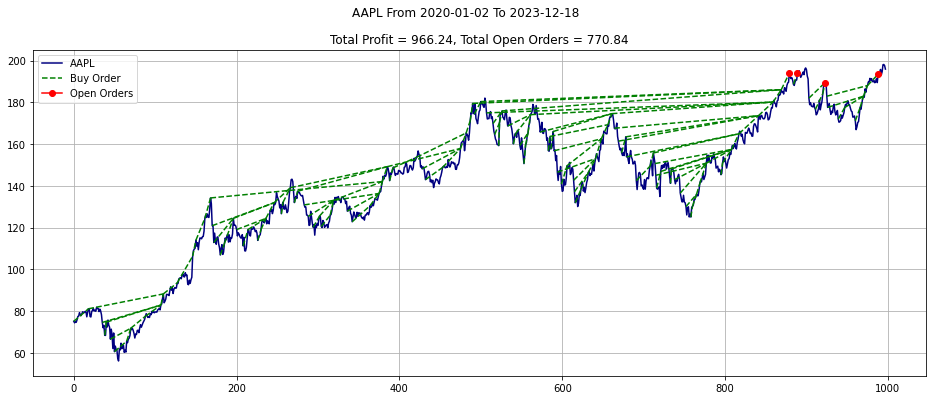

In [18]:
import pylab as pl
from matplotlib import collections  as mc

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,6

startDate = str(df.index[0]).split()[0]
endDateStart = str(df.index[-1]).split()[0]
title = f'{ticker1} From {startDate} To {endDateStart}'
pl.suptitle(title)

totalProfit = sum(profits)
totalOpenOrders = sum([x[2] for x in openOrders])
pl.title(f'Total Profit = {totalProfit:.2f}, Total Open Orders = {totalOpenOrders:.2f}')

XX = [x for x in range(len(df))]
yt1 = [x for x in df.Close]
pl.plot(XX, yt1, color = 'navy', label=ticker1)
my_label = 'Buy Order'
for p in orders:
  x1, y1 = p[0], p[2]
  x2, y2 = p[4], p[3]
  if p[4]>0:
    pl.plot([x1, x2], [y1, y2], color='green', linestyle='dashed', label=my_label)
    my_label = '_nolegend_'

my_label = 'Open Orders'
for p in openOrders:
  pl.plot(p[0],p[2], marker='o', color='red', label=my_label)
  my_label = '_nolegend_'

pl.legend()
pl.grid(True)
pl.show();


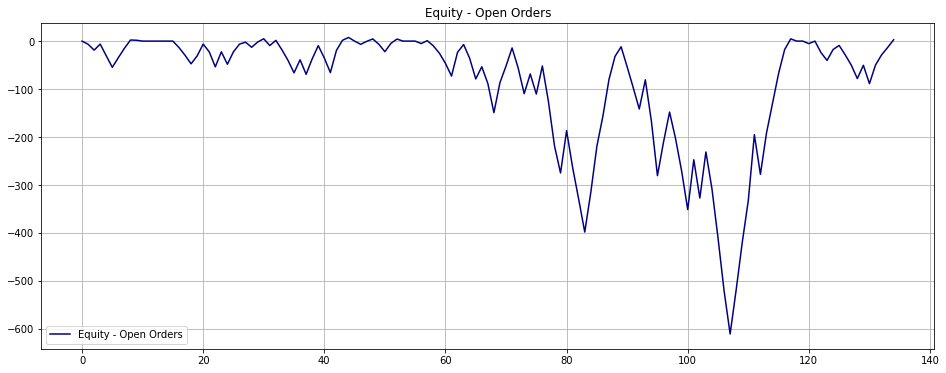

In [20]:
XX = [x for x in range(len(equity))]
yt = equity
pl.plot(XX, yt, color = 'navy', label='Equity - Open Orders')
pl.title('Equity - Open Orders')
pl.legend()
pl.grid(True)
pl.show();


In [ ]:
#equity Profits
eqProfit = [profits[0]]
for x in profits[1:]:
  eqProfit.append(x+eqProfit[-1])

XX = [x for x in range(len(eqProfit))]
yt = eqProfit
pl.plot(XX, yt, color = 'Green', label='Equity Profits')
pl.title('Equity Profits')
pl.legend()
pl.grid(True)
pl.show();